### Lab 4 Overview
#### First Half
- Doing basic statistical models with Python
- R to Python equivalents 

#### Second Half
- *Questions?*
- *Industry techniques and basic procedures?*

### Statistical Learning in Python
- Regression
- General Linear Models (GLM, more from MAST30027...)
- LASSO, Ridge Regression and more...

We will be using `"100k_yellow_2015_05.csv"` which can be obtained from Canvas.  
This dataset is a 100k sample from (https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-05.csv) 

___________________

In [1]:
# this is the equivalent package lm or glm
from statsmodels.formula.api import *
import matplotlib.pyplot as plt
import numpy as np

# read in the data
import pandas as pd
df = pd.read_csv("../Data/Lab4/100k_yellow_2015_05.csv")

In [2]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

(From the lab): As an example, let's try to predict `total_amount` using `fare_amount, tip_amount, toll_amount, trip_distance, VendorID` as predictors.

Some things to take note:
- `tip_amount` is only valid for `payment_type == 1` (card)
- `VendorID` is categorical, with only two possible values (`1` or `2`) so we should make it boolean

In [3]:
# filter dataframe
COL_FILTER = ['total_amount', 'fare_amount', 'tip_amount', 'tolls_amount', 'trip_distance', 'VendorID']
df_filtered = df.loc[df['payment_type'] == 1, COL_FILTER].reset_index(drop=True)
df_filtered['VendorID'] = df_filtered['VendorID'] == 1

df_filtered.tail()

,total_amount,fare_amount,tip_amount,tolls_amount,trip_distance,VendorID
61887,12.25,8.0,2.45,0.0,1.70,False
61888,8.16,5.0,1.36,0.0,0.89,False
61889,7.55,4.5,1.25,0.0,0.50,True
61890,11.80,9.0,2.00,0.0,1.80,True
61891,11.00,8.0,2.20,0.0,1.90,True


(From the lab): We are looking for linear relationships between our chosen response `total_amount`.   
(Me): Now I'm not sure what kind of life you've lived, but I'm fairly certain that we can infer that `total_amount` will have a positive linear relationship with `fare_amount`. Let's see a quick plot...

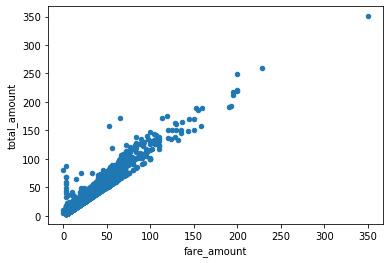

In [4]:
df_filtered[['total_amount', 'fare_amount']].plot.scatter(x='fare_amount', y='total_amount')
plt.show()

Now obviously this looks like a positive linear relationship.

In R, we would do something like this for (Ordinary) Least Squares:
```R
>>> fit <- lm(total_amount~fare_amount + tip_amount + tolls_amount + trip_distance + VendorID ,data=dat_fit)
>>> summary(fit)
```
```
Call:
lm(formula = total_amount ~ fare_amount + tip_amount + tolls_amount +
trip_distance + VendorID, data = dat_fit)

Residuals:
Min     1Q      Median  3Q     Max
-1.4727 -0.3295 -0.1528 0.1747 1.7975

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)    1.162154   0.002986 389.194  <2e-16 ***
fare_amount    0.993388   0.000315 3153.943 <2e-16 ***
tip_amount     1.006511   0.000826 1218.553 <2e-16 ***
tolls_amount   0.979325   0.001285 762.428  <2e-16 ***
trip_distance  0.011742   0.000963 12.194   <2e-16 ***
VendorIDTRUE  -0.003125   0.002914 -1.073    0.283
---
Signif. codes:
0 ^a˘A¨Y***^a˘A´Z 0.001 ^a˘A¨Y**^a˘A´Z 0.01 ^a˘A¨Y*^a˘A´Z 0.05 ^a˘A¨Y.^a˘A´Z 0.1 ^a˘A¨Y ^a˘A´Z 1

Residual standard error: 0.362 on 61886 degrees of freedom
Multiple R-squared: 0.9994,          Adjusted R-squared: 0.9994
F-statistic: 1.953e+07 on 5 and 61886 DF, p-value: < 2.2e-16
```

Well, whatever you can do in R can also done in Python (to an extent).  
Documentation Source: https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html?highlight=ols

In [5]:
fit = ols(formula="total_amount ~ fare_amount + tip_amount + tolls_amount + trip_distance + VendorID",
         data=df_filtered).fit()

In [6]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.953e+07
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:58:27   Log-Likelihood:                -24933.
No. Observations:               61892   AIC:                         4.988e+04
Df Residuals:                   61886   BIC:                         4.993e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1622      0.003  

- The table structure is a bit different, though it is identical in value with R's output.  
- The coefficient table is the same, but now includes a 95% CI for the beta coefficients.

General Inference:
- The $R^2$ value is 0.999 which is insanely large. As a rule of thumb, large $R^2$ values indicate a good fit. 
- *Perhaps too good of a fit - recall overfitting from LSM and ML*
- If we have a hypothesis for a null model vs our fitted model, then we look at the `F-statistc = 1.953e+07`. As our F statistic is less than $\alpha=0.05$, we can conclude that our fitted model is better than a null model.

Extra steps:
- Perform backwise or forward selection with the model
- Do feature engineering (think about coefficients that are not significant)
- Example: `VendorID == True` is not significant with as the `t-test` value is `0.283 > 0.05`. Perhaps we should drop this attribute...

___________________

### LASSO 
- One of many ways to avoid overfitting 
- Bit of a work around to install with Python for Windows. Works on Mac/Bash fine.
- Refer to the next section for an installation guide on Windows

Quick overview:
- LASSO may cause coefficients to be set to 0
- To prevent this, we need to standardize the predictor (X matrix) to have $\mu=0, \sigma^2=1$

Revise in your own time if you've forgotten:
- LSM topic 5 (`ch05_handout`) slide 141/141
![lasso](./cloud/lasso.PNG)

In [7]:
yCOLS = ['total_amount']
xCOLS = ['fare_amount', 'tip_amount', 'tolls_amount', 'trip_distance', 'VendorID']

# standardize (by calculating the zscore) so our data has mean 0 and var 1
from scipy.stats import zscore
df_standard = df_filtered[xCOLS].astype(float).apply(zscore)

In [8]:
# format output to 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format
df_standard.describe().loc[['mean','std']]

,fare_amount,tip_amount,tolls_amount,trip_distance,VendorID
mean,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00


As you can see, `df_standard` has  $\mu=0, \sigma=1(=\sigma^2)$  

*Note, since I am running Windows, I have to call python3 via bash to get it working. I've already installed the packages, but you will need to follow the steps at the end if you want to get it working with Python.*  

In [9]:
%%bash
python3

# redo processing within bash python3
import pandas as pd
from scipy.stats import zscore

COL_FILTER = ['total_amount', 'fare_amount', 'tip_amount', 'tolls_amount', 'trip_distance', 'VendorID']
yCOLS = ['total_amount']
xCOLS = ['fare_amount', 'tip_amount', 'tolls_amount', 'trip_distance', 'VendorID']

df = pd.read_csv("../Data/Lab4/100k_yellow_2015_05.csv")
df_filtered = df.loc[df['payment_type'] == 1, COL_FILTER].reset_index(drop=True)
df_filtered['VendorID'] = df_filtered['VendorID'] == 1
df_standard = df_filtered[xCOLS].astype(float).apply(zscore)

# shape of our df to verify same filtering was applied
print(df_standard.shape)

# now we can fit our model
from glmnet import ElasticNet

lasso_fit = ElasticNet()
lasso_fit.fit(df_standard.values, df_filtered[yCOLS].values)

# now we want to look at the tuning parameter (lambda)
# this can be accessed using the .lambda_best_ method after fitting!
print(f"Best lambda value for LASSO: {lasso_fit.lambda_best_[0]}")

# to predict a set of new X values
"""
lasso_fit.predict(x)
"""
# by default, predictions use the best lambda values

(61892, 5)
Best lambda value for LASSO: 0.23665078615126328


/home/akwang/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Installation Guide for glmnet Windows

#### Method 1:
- Install WSL (refer to lab1's link)
- Install `python3` using `sudo apt install python3` 
- Install packages:
    1. `pip3 install glmnet pandas scipy numpy matplotlib`
    2. `sudo add-apt-repository ppa:jonathonf/gcc-7.1`
    3. `sudo apt-get install gcc-7 g++-7`
    4. `sudo apt-get install gfortran-7`
- Documentation for Python `glmnet`: https://github.com/civisanalytics/python-glmnet
- Now you can use Jupyter Notebooks' bash magic to run the required parts
- If error, https://stackoverflow.com/questions/46516394/how-to-install-libgfortran-so-4-on-ubuntu-16-06

#### Method 2:
- https://stackoverflow.com/a/56444043

#### Method 3:
- Just use `R` if you really want to do LASSO

___________________

### Fitting a GLM
- Well, this is exactly what you *should* be learning in MAS (MAST30027) right now

(From the lab): The `passenger_count` attribute is discrete and non-negative. If we were to predict it, a linear model will not be sufficient. 
- We know that a poisson distribution takes in non-negative integer values, so we can use the Poisson family of GLMs to model this. 
- We will use `total_amount, trip_distance, VendorID` as our regressors.

In [15]:
from statsmodels.api import families

# convert VendorID to categorical
df['VendorID'] = df['VendorID'] == 1

fit = glm(formula="passenger_count ~ total_amount + trip_distance + VendorID",
         data=df, family=families.Poisson()).fit()

print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        passenger_count   No. Observations:                99999
Model:                            GLM   Df Residuals:                    99995
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4936e+05
Date:                Sat, 01 Aug 2020   Deviance:                       69274.
Time:                        17:03:28   Pearson chi2:                 8.50e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7194      0.004  

- We can see that `total_amount` is insignificant (`p-val=0.124>0.05`)
- Conclude that the total fare amount does not really affect the number of passengers in a trip